# Autoencoder with Dense Layer
- https://blog.keras.io/building-autoencoders-in-keras.html

## Import Packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.datasets import mnist

/Users/skim0119/venv/GenP3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/skim0119/venv/GenP3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Prepare Data

- Label is not imported, because autoencoder is unsupervised learning method
- MNIST contain 60,000 training dataset and 10,000 test dataset.

In [2]:
(X_train, _), (X_test, _) = mnist.load_data() # label is not imported
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('MNIST Dataset Imported')

MNIST Dataset Imported


## Model

In [3]:
mid_dim = 36
input_layer = Input(shape=(784,))
enc_layer    = Dense(mid_dim, activation='relu')(input_layer)
dec_layer   = Dense(784, activation='sigmoid')(enc_layer)


model = Model(input_layer, dec_layer)
model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

encoder = Model(input_layer, enc_layer)

encoded_input = Input(shape=(mid_dim,))
decoder_layer = model.layers[-1] # last layer
decoder = Model(encoded_input, decoder_layer(encoded_input))

## Training

In [11]:
nepoch = 5
history = model.fit(X_train, X_train,
                          epochs=nepoch,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 124us/step - loss: 0.2220 - acc: 0.7975 - val_loss: 0.2119 - val_acc: 0.7978
Epoch 2/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.2068 - acc: 0.7984 - val_loss: 0.1995 - val_acc: 0.7986
Epoch 3/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.1964 - acc: 0.7993 - val_loss: 0.1909 - val_acc: 0.7994
Epoch 4/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.1888 - acc: 0.8002 - val_loss: 0.1841 - val_acc: 0.8002
Epoch 5/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.1825 - acc: 0.8012 - val_loss: 0.1781 - val_acc: 0.8012


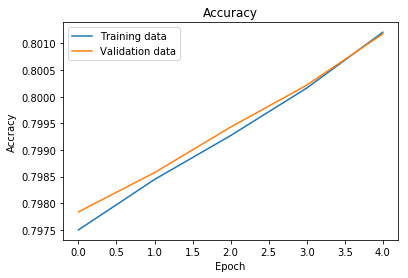

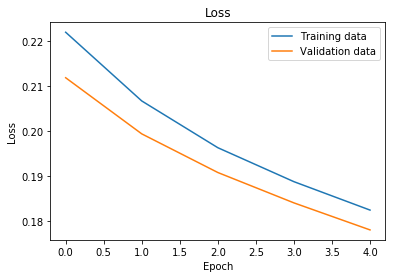

In [12]:
if not isinstance(history, dict):
    history = history.history
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc=0)
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc=0)
plt.show()

## Result and Analysis

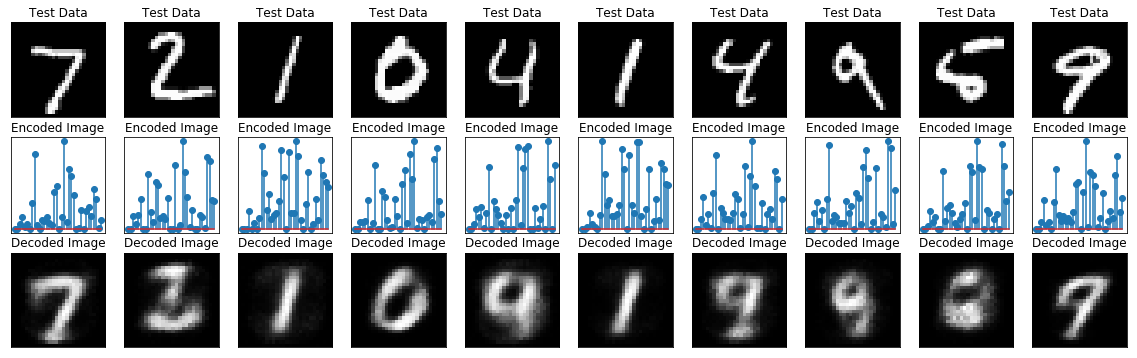

In [13]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    subfig = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    subfig.get_xaxis().set_visible(False)
    subfig.get_yaxis().set_visible(False)
    subfig.set_title('Test Data')

    subfig = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    subfig.get_xaxis().set_visible(False)
    subfig.get_yaxis().set_visible(False)
    subfig.set_title('Decoded Image')

    subfig = plt.subplot(3, n, i + 1 + n)
    plt.stem(encoded_imgs[i].reshape(-1))
    subfig.get_xaxis().set_visible(False)
    subfig.get_yaxis().set_visible(False)
    subfig.set_title('Encoded Image')
plt.show()